In [7]:
import pandas as pd
import numpy as np

import itertools
import scipy

from pathlib import Path
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [8]:
import datetime
print(datetime.datetime.now())

2021-11-13 13:59:48.682600


In [9]:
import sklearn
print('Gang gang scikit version {}.'.format(sklearn.__version__))

Gang gang scikit version 0.24.1.


In [10]:
features_df = pd.read_csv('training_set_features.csv', index_col='respondent_id')

In [11]:
features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [12]:
labels_df = pd.read_csv('training_set_labels.csv', index_col='respondent_id')

In [13]:
labels_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [14]:
print(features_df.shape)

(26707, 35)


In [15]:
print(labels_df.shape)

(26707, 2)


In [16]:
features_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [17]:
np.testing.assert_array_equal(features_df.index.values, labels_df.index.values)

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Proportion of H1N1 Vaccine'}>

Text(0, 0.5, 'h1n1_vaccine')

<AxesSubplot:title={'center':'Poportion of Seasonal Vaccine'}>

Text(0, 0.5, 'seasonal_vaccine')

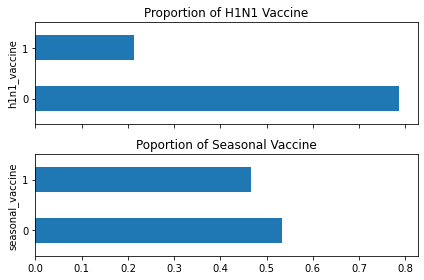

In [35]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = labels_df.shape[0]

(labels_df['h1n1_vaccine'].value_counts().div(n_obs).plot.barh(title='Proportion of H1N1 Vaccine', ax=ax[0]))
ax[0].set_ylabel('h1n1_vaccine')


(labels_df['seasonal_vaccine'].value_counts().div(n_obs).plot.barh(title='Poportion of Seasonal Vaccine', ax=ax[1]))
ax[1].set_ylabel('seasonal_vaccine')

fig.tight_layout()

In [46]:
pd.crosstab(labels_df['h1n1_vaccine'],labels_df['seasonal_vaccine'], margins=True, normalize=True)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [49]:
(labels_df['h1n1_vaccine'].corr(labels_df['seasonal_vaccine'], method='pearson'))

0.37714265306144507

In [51]:
joined_df = features_df.join(labels_df)
print (joined_df.shape)
joined_df.head()

(26707, 37)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [78]:
counts = (joined_df[['h1n1_concern', 'h1n1_vaccine']].groupby(['h1n1_concern', 'h1n1_vaccine']).size())

In [79]:
counts

h1n1_concern  h1n1_vaccine
0.0           0               2849
              1                447
1.0           0               6756
              1               1397
2.0           0               8102
              1               2473
3.0           0               3250
              1               1341
dtype: int64

In [80]:
counts = (joined_df[['h1n1_concern', 'h1n1_vaccine']].groupby(['h1n1_concern', 'h1n1_vaccine']).size().unstack('h1n1_vaccine'))

In [81]:
counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


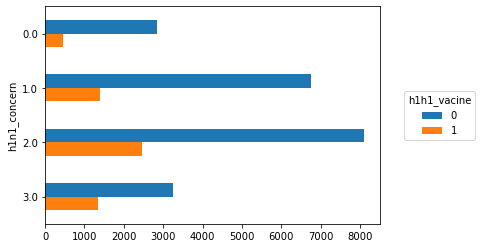

In [95]:
ax = counts.plot.barh()
ax.invert_yaxis()
ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), title='h1n1_vacine')

In [100]:
h1n1_concern_counts = counts.sum(axis='columns')

In [101]:
h1n1_concern_counts

h1n1_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [106]:
props = counts.div(h1n1_concern_counts, axis='index')

In [107]:
props

h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


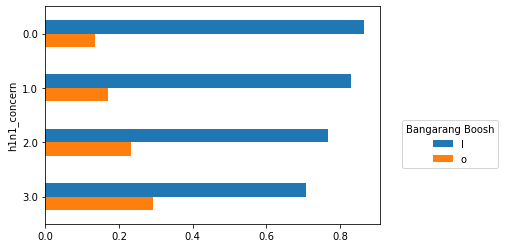

In [113]:
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend('loc=center left', bbox_to_anchor=(1.05, 0.5), title='Bangarang Boosh')


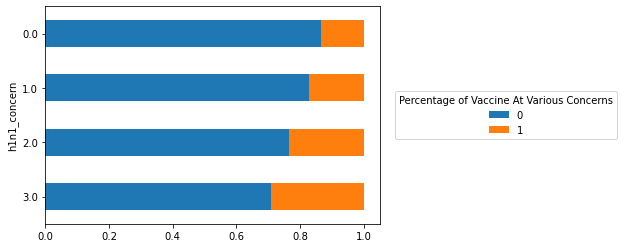

In [119]:
ax = props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1.03, 0.5), title='Percentage of Vaccine At Various Concerns')

In [146]:
def vaccination_rate_plot(col, target, data, ax=None):


  counts = (joined_df[[target, col]].groupby([target, col]).size().unstack(target))
  group_counts = counts.sum(axis='columns')
  props = counts.div(group_counts, axis='index')

  props.plot(kind='barh', stacked=True, ax=ax)
  ax.invert_yaxis()
  ax.legend().remove()

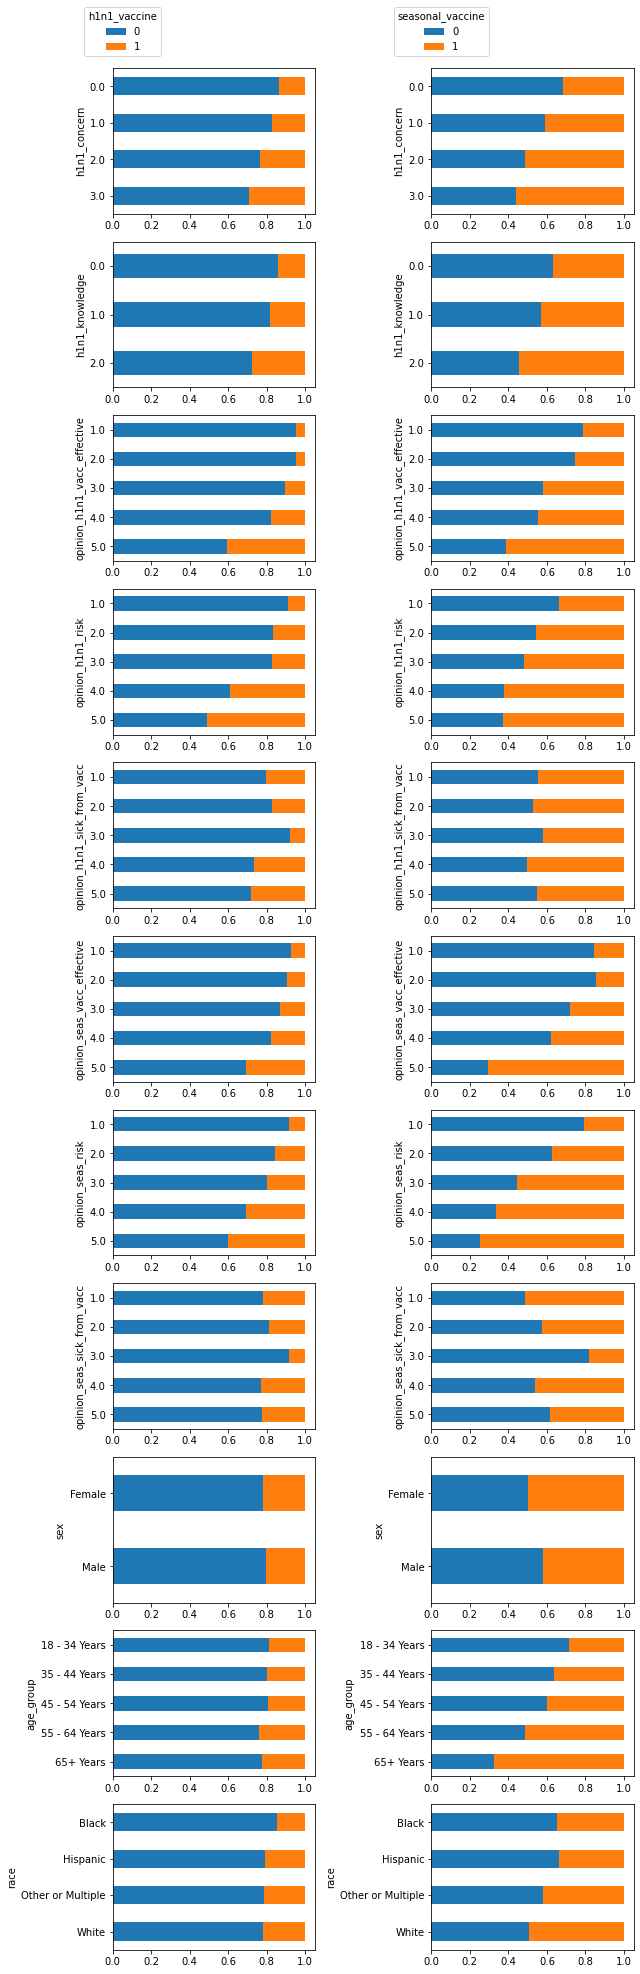

In [147]:
cols_to_plot = ['h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    'sex',
    'age_group',
    'race',]

fig, ax = plt.subplots(len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5))

for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(col, 'h1n1_vaccine', joined_df, ax=ax[idx, 0])
    vaccination_rate_plot(col, 'seasonal_vaccine', joined_df, ax=ax[idx, 1])
    
ax[0, 0].legend(loc='lower center', bbox_to_anchor=(0.05, 1.05), title='h1n1_vaccine')

ax[0, 1].legend(loc='lower center', bbox_to_anchor=(0.05, 1.05), title='seasonal_vaccine')

fig.tight_layout()